# Prediction using Decision Tree Algorithm 
## Author: Parth Mistry

 ## Problem Statement
 * The dataset has three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

 * The columns in this dataset are Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species

 * The solution problem: Multiclass Classification using Decision Tree

## 1. Importing Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importing the dataset

In [2]:
dataset = pd.read_csv('Iris.csv')
dataset = dataset.drop('Id',axis=1)

## 3. Exploratory Data Analysis


### 3.1 Setting the color palette

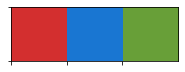

In [3]:
colors = ['#D32F2F','#1976D2','#689F38']
sns.palplot(sns.color_palette(colors))

### 3.2 Viewing the dataset

In [4]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 3.3 Dataset shape

In [5]:
dataset.shape

(150, 5)

### 3.4 Checking any missing values

In [6]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Bar Graph

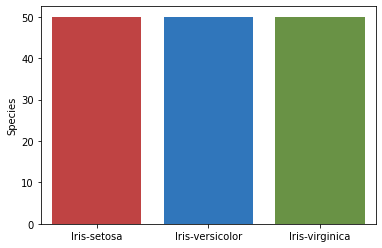

In [7]:
plt1 = sns.barplot(dataset["Species"].unique(), dataset["Species"].value_counts(), data=dataset, palette=colors)

#### Scatter Plot

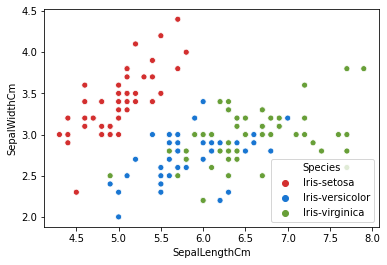

In [8]:
sctrplt = sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=dataset,palette=colors)

## 4. Data Preprocessing


### 4.1 Getting Labels

In [9]:
labels = dataset.pop('Species')
label_encoder = LabelEncoder().fit(labels)
labels = label_encoder.transform(labels)
classes = label_encoder.classes_    

In [10]:
labels[0],classes[0]

(0, 'Iris-setosa')

## 5. Train Test Split

In [11]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(dataset, labels, test_size=0.25)
([train_dataset.shape, train_labels.shape[0]], [test_dataset.shape, test_labels.shape[0]])

([(112, 4), 112], [(38, 4), 38])

Checking the dataset for any null values, missing values or any categorical data.

In [12]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,112.0,5.884821,0.780415,4.4,5.200,5.90,6.4,7.7
SepalWidthCm,112.0,3.044643,0.417811,2.2,2.800,3.00,3.3,4.4
PetalLengthCm,112.0,3.874107,1.706308,1.2,1.600,4.50,5.1,6.7
PetalWidthCm,112.0,1.236607,0.750855,0.1,0.375,1.35,1.8,2.5


We have only numeric features and it is good because we don't need to work with categorical data, etc. We only need to make normalization and I add a transformer for normalization to the classifications pipeline

## 6. Model/Pipeline Creation


Here we will create a pipeline which will contain two elements.  
1. Firstly, we need to scale the data. Therefore we will use the Standard Scalar from ```sklearn.preprocessing```  
2. Secondly. We will create a Decision Tree Classifier to classify the data from ```sklearn.tree```

In [13]:
classifier = pipeline.make_pipeline(StandardScaler(),tree.DecisionTreeClassifier(max_depth=2))
classifier.fit(train_dataset,train_labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2))])

## 7. Model Evaluation and Metrics

In [14]:
pred = classifier.predict(test_dataset)
dt_metrics = {
     "train accuracy": classifier.score(train_dataset, train_labels),
    "test accuracy": metrics.accuracy_score(test_labels, pred),
}
print('Training Accuracy =',dt_metrics['train accuracy']) 
print('Test Accuracy =',dt_metrics['test accuracy']) 

Training Accuracy = 0.9553571428571429
Test Accuracy = 0.9736842105263158


## 8. Tree Visualization

[Text(133.92000000000002, 181.2, 'X[2] <= -0.75\ngini = 0.665\nsamples = 112\nvalue = [34, 40, 38]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 0.687\ngini = 0.5\nsamples = 78\nvalue = [0, 40, 38]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.169\nsamples = 43\nvalue = [0, 39, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

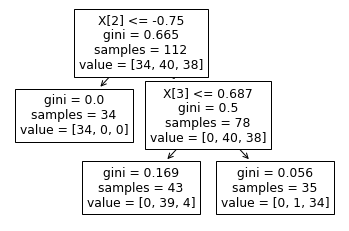

In [15]:
tree.plot_tree(classifier['decisiontreeclassifier'])